## NLP (Natural Language Processing)
Natural language processing (NLP) is a field of computer science that studies how computers and humans interact. In the 1950s, Alan Turing published an article that proposed a measure of intelligence, now called the Turing test. More modern techniques, such as deep learning, have produced results in the fields of language modeling, parsing, and natural-language tasks.
The goal of this study is to demonstrate how NLP techniques can assist in understanding and analyzing a dataset through data preprocessing and cleaning alone.

### Required Packages

In [1]:
## For dataframes manipulation
import pandas as pd
import os

## For graphics
import seaborn as sns
import matplotlib.pyplot as plt
## Choosing a specific color of a palete
import matplotlib as mpl

## For string's treatment
import re
import string

## NLP Model
from spacy import load
## Loading NLP model
nlp = load('en_core_web_sm')

## WordCloud
from collections import Counter
from wordcloud import WordCloud

### Functions

In [2]:
#############################
#### % OF NULL VALUES #######
#############################

def percent_nulls(df,list_columns):
    total_lines = df.shape[0]
    list_percent = []

    ## SAVING THE OUTPUT OF THE FUNCTION THAT RETURNS THE NUMBER OF NULLS PER COLUMN
    test_nulls = df.isnull().sum()

    ## SAVE THE RESULT IN A DATAFRAME
    test_nulls = pd.DataFrame({'COLUMN':test_nulls.index, 'NULLS_VALUES':test_nulls.values})

    ## SELECT ONLY THE COLUMNS THAT NEED TO BE EVALUATED
    test_nulls = test_nulls.query('COLUMN == @list_columns')

    ## SAVE COLUMN NAMES IN A LIST
    columns = test_nulls.COLUMN.tolist()

    ## SAVES MISSINGS VALUES PER COLUMN IN A LIST
    null_values = test_nulls.NULLS_VALUES.tolist()

    ## get list of tuples from two lists and merge them using zip().
    tuples_list = list(zip(columns, null_values))

    # convert a list of tuples to a DataFrame
    df_nulls = pd.DataFrame(tuples_list, columns=['colunas', 'valor'])

    ## FILTERING ONLY COLUMNS THAT HAVE DATA IN DF
    for i,column in enumerate(columns):
        percentual = round((null_values[i]/total_lines)*100,2)
        list_percent.append(percentual)

    ## Transforming the list of percentages into a pandas df
    list_percent = pd.DataFrame(list_percent, columns = ['percentual'])

    ## Adding percentage information to df
    df_nulls = pd.concat([df_nulls,list_percent], axis = 1)

    return(df_nulls)


def nlp_function(text):
    ## Apply lower case
    text = str(text).lower()

    ## Removing caracteres
    text = re.sub(r'\[.*?\]', '', text)  # Usando raw string
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Usando raw string
    text = re.sub(r'<.*?>+', '', text)  # Usando raw string
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Aqui não é necessário raw string
    text = re.sub(r'\n', '', text)  # Usando raw string
    text = re.sub(r'\w*\d\w*', '', text)  # Usando raw string

    ## Applying the trained model (spacy)
    doc = nlp(text)

    ## Lemmatization
    text = " ".join([token.lemma_ for token in doc])

    ## Remove stop words
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    text = " ".join(filtered_tokens)

    return text


# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)
    # Filter words (tokens) by removing stop words and punctuation
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return words



In [3]:
##-----------------------
## PATH VARIABLES
##-----------------------

# Gets the directory where the script is located
main_path = os.getcwd()

# Creates relative path from script directory
relative_path = os.path.join(main_path, 'reviews_data.csv')

In [4]:
## Loading the dataset
df = pd.read_csv(relative_path)
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [5]:
###############################################################################
###### EVALUATING THE PERCENTAGE OF NULL NULL NULL COLUMNS ####################
###############################################################################

list_columns = list(df.columns)
df_nulls = percent_nulls(df,list_columns)
df_nulls.head(10)

,colunas,valor,percentual
0,name,0,0.00
1,location,0,0.00
2,Date,0,0.00
3,Rating,145,17.06
4,Review,0,0.00
5,Image_Links,0,0.00


As you can see, there are 145 null values ​​in the Rating column, which is the target variable. These null data would correspond to the test data for prediction after the classification model is trained. As stated before, the objective of this study is only to demonstrate the NLP technique, however this same data could be used to build a classification or prediction model.

In [6]:
### About the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


The Date column contains date values, however the identified type is of the object type, it is necessary to change the column type to use it properly in graphs.

In [7]:
## Copying the original column and handling it in an added column
df['date_treat'] = df['Date']
df['date_treat'] = df['date_treat'].str.split('Reviewed').str[1] # separating the string using the / criterion
df['date_treat'] = df['date_treat'].str.strip() # removing whitespace at the beginning and end of the string

## Removing the dot from some strings
df['date_treat'] = df['date_treat'].str.replace('.', '')

## Passing data type to datetime
df['date_treat'] = pd.to_datetime(df['date_treat'], format = "mixed")

## Changing the order of the columns and removing the Image_Links column that will not be used
df = df[['name',
         'location',
         'Date',
         'date_treat',
         'Rating',
         'Review']]

df.head()

,name,location,Date,date_treat,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...


Now that the date field has been adjusted, the location field is processed by separating the string into city and state.

In [8]:
### Creating the city column with the information that comes before the comma in the location column
df.insert(2, "city", df["location"].str.split(",").str[0])
df['city'] = df['city'].str.strip() # removing whitespace at the beginning and end of the string

### Creating the state column with the information that comes after the comma in the location column
df.insert(3, "state", df["location"].str.split(",").str[1])
df['state'] = df['state'].str.strip() # removing whitespace at the beginning and end of the string

df.head()

,name,location,city,state,Date,date_treat,Rating,Review
0,Helen,"Wichita Falls, TX",Wichita Falls,TX,"Reviewed Sept. 13, 2023",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",Apopka,FL,"Reviewed July 16, 2023",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",Cranberry Twp,PA,"Reviewed July 5, 2023",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",Seattle,WA,"Reviewed May 26, 2023",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",Gresham,OR,"Reviewed Jan. 22, 2023",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [9]:
## The Rating column should only have integer values ​​because it is a score.
## Changing the data type
df = df.astype({'Rating': 'Int64'})
df.Rating.unique()

<IntegerArray>
[5, 1, 2, 3, 4, <NA>]
Length: 6, dtype: Int64

In [10]:
## Day of the week
df['day_of_week'] = df['date_treat'].dt.strftime('%A')
df.head()

,name,location,city,state,Date,date_treat,Rating,Review,day_of_week
0,Helen,"Wichita Falls, TX",Wichita Falls,TX,"Reviewed Sept. 13, 2023",2023-09-13,5,Amber and LaDonna at the Starbucks on Southwes...,Wednesday
1,Courtney,"Apopka, FL",Apopka,FL,"Reviewed July 16, 2023",2023-07-16,5,** at the Starbucks by the fire station on 436...,Sunday
2,Daynelle,"Cranberry Twp, PA",Cranberry Twp,PA,"Reviewed July 5, 2023",2023-07-05,5,I just wanted to go out of my way to recognize...,Wednesday
3,Taylor,"Seattle, WA",Seattle,WA,"Reviewed May 26, 2023",2023-05-26,5,Me and my friend were at Starbucks and my card...,Friday
4,Tenessa,"Gresham, OR",Gresham,OR,"Reviewed Jan. 22, 2023",2023-01-22,5,I’m on this kick of drinking 5 cups of warm wa...,Sunday


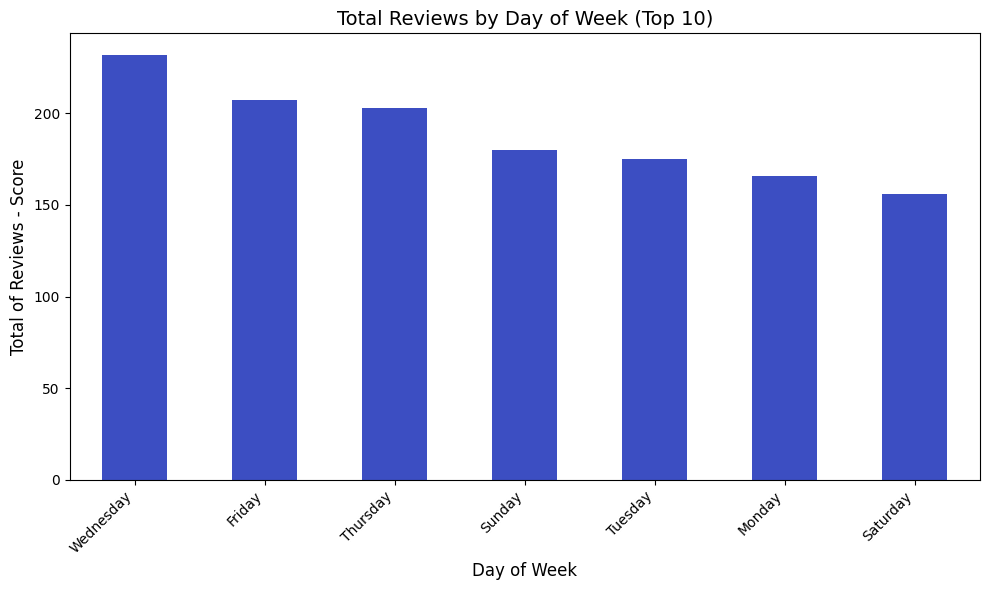

In [11]:
## Rating for day of the week

# Group by day of the week and add up the ratings
rating_by_dw = df.groupby('day_of_week')['Rating'].sum()

# Sort the days of the week by total ratings
rating_by_dw = rating_by_dw.sort_values(ascending=False)

# Escolha uma cor da paleta coolwarm
cmap = mpl.colormaps['coolwarm']  # Nova forma de acessar a paleta
color = cmap(1)  # Por exemplo, escolha uma cor do meio da paleta

# Create the bar chart
plt.figure(figsize=(10, 6))
rating_by_dw.plot(kind='bar', color=color)

# Titles and labels
plt.title('Total Reviews by Day of Week (Top 10)', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total of Reviews - Score', fontsize=12)

# Adjust label rotation and alignment
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


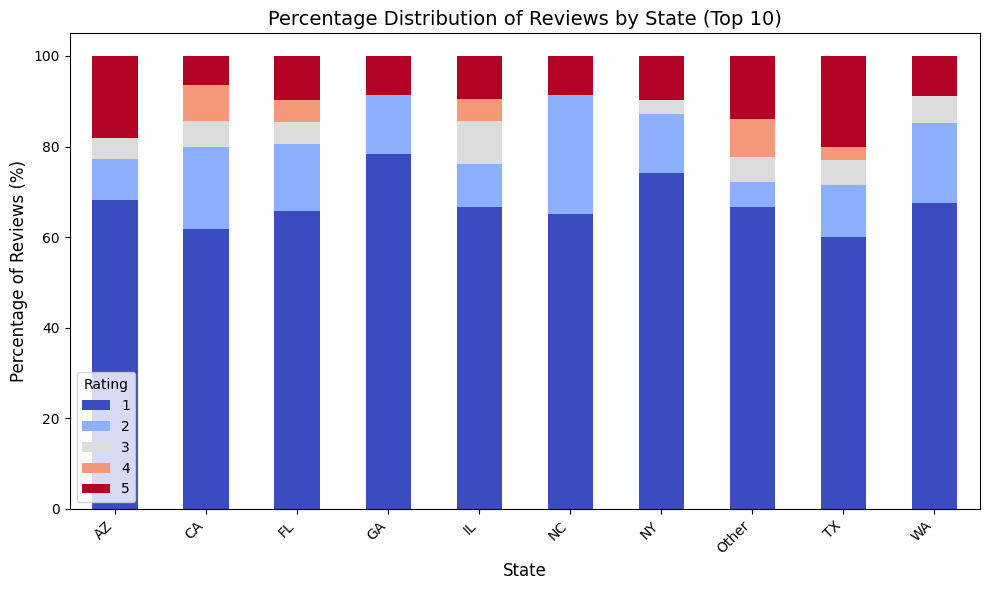

In [12]:
# Group by state and add up the total reviews per state
total_ratings_by_state = df.groupby('state')['Rating'].count()

# Select the top 10 states with the most reviews
top_10_states = total_ratings_by_state.nlargest(10).index

# Filter the DataFrame for the top 10 states
df_top_10 = df[df['state'].isin(top_10_states)]

# Count the number of reviews by status and rating
rating_by_state = df_top_10.groupby(['state', 'Rating']).size().unstack(fill_value=0)

# Calculate the percentage of each rating by state
rating_percent = rating_by_state.div(rating_by_state.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
rating_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm') ## 

# Titles and labels
plt.title('Percentage Distribution of Reviews by State (Top 10)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)

# Adjust state label rotation
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


In [13]:
# Agrupar por estado e contar o número de avaliações por estado
total_ratings_by_state = df.groupby('state')['Rating'].count()

# Selecionar e exibir os top 10 estados com mais avaliações
top_10_states = total_ratings_by_state.nlargest(10)
top_10_states.head(15)

state
CA       139
FL        41
Other     36
TX        35
WA        34
NY        31
GA        23
NC        23
AZ        22
IL        21
Name: Rating, dtype: Int64

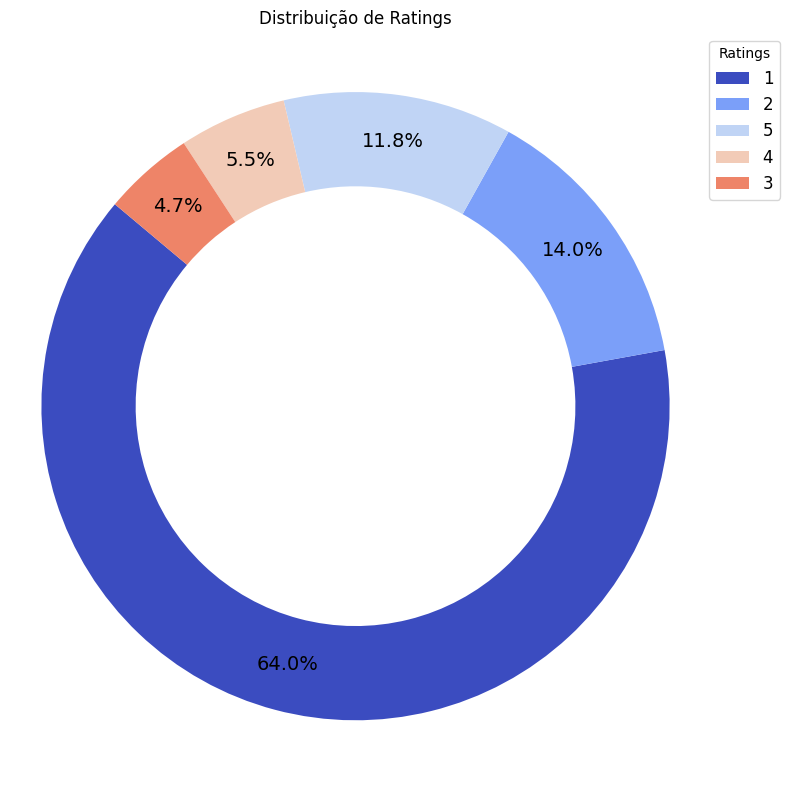

In [14]:
# Calcular a contagem de cada rating
rating_counts = df['Rating'].value_counts()

# Criar um colormap da paleta coolwarm
cmap = mpl.colormaps['coolwarm']
colors = [cmap(i / len(rating_counts)) for i in range(len(rating_counts))]

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))

# Plote o gráfico de pizza sem os números nas fatias
wedges, texts, autotexts = plt.pie(
    rating_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85,  # Aumenta a distância dos percentuais
    wedgeprops=dict(width=0.3)  # Para criar um gráfico de pizza com uma borda interna
)

# Aumentar o tamanho da fonte dos percentuais
for text in autotexts:
    text.set_fontsize(14)  # Ajuste o tamanho da fonte conforme desejado

# Adicionar a legenda
plt.legend(wedges, rating_counts.index, title="Ratings", fontsize=12, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Título e ajuste visual
plt.title('Distribuição de Ratings', fontsize=12)
plt.axis('equal')  # Para garantir que o gráfico de pizza seja circular
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [15]:
##-----------------------
## USING NLP MODEL TO TREAT REVIEWS
##-----------------------
df["review_treat"] = df["Review"].apply(nlp_function)
df.head()

,name,location,city,state,Date,date_treat,Rating,Review,day_of_week,review_treat
0,Helen,"Wichita Falls, TX",Wichita Falls,TX,"Reviewed Sept. 13, 2023",2023-09-13,5,Amber and LaDonna at the Starbucks on Southwes...,Wednesday,amber ladonna starbucks southwest parkway warm...
1,Courtney,"Apopka, FL",Apopka,FL,"Reviewed July 16, 2023",2023-07-16,5,** at the Starbucks by the fire station on 436...,Sunday,starbucks fire station altamonte springs f...
2,Daynelle,"Cranberry Twp, PA",Cranberry Twp,PA,"Reviewed July 5, 2023",2023-07-05,5,I just wanted to go out of my way to recognize...,Wednesday,wanted way recognize starbucks employee billy ...
3,Taylor,"Seattle, WA",Seattle,WA,"Reviewed May 26, 2023",2023-05-26,5,Me and my friend were at Starbucks and my card...,Friday,friend starbucks card work thankful worker pai...
4,Tenessa,"Gresham, OR",Gresham,OR,"Reviewed Jan. 22, 2023",2023-01-22,5,I’m on this kick of drinking 5 cups of warm wa...,Sunday,kick drinking cups warm water work instacart...


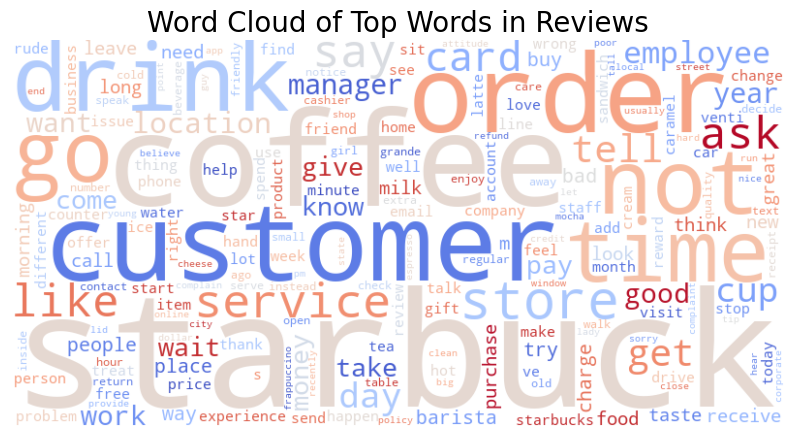

In [16]:
# Apply the preprocessing function
df['processed_reviews'] = df['review_treat'].apply(preprocess_text)

# Count the frequency of words
word_freq = Counter()
for review in df['processed_reviews']:
    word_freq.update(review)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(word_freq)

# View the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes
plt.title('Word Cloud of Top Words in Reviews', fontsize=20)
plt.show()